In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00


In [ ]:
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.5 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=12294ee450ec0a10c5af09289cee2c2316b1fc1e615fac94c80abea1d355febe
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=fc5cbec8a4ad6aaa695329386bb052e210ccb3411c604e2635bd7f3beaacde6c
  Stored in directory: /root/.cache/pip/w

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pytorch_lightning as pl
from torch import nn
from tqdm.notebook import tqdm

In [ ]:
import opendatasets as od

# od.download("https://www.kaggle.com/bulentsiyah/semantic-drone-dataset", force= True)
od.download("https://www.kaggle.com/datasets/dansbecker/cityscapes-image-pairs", force= True)
# od.download("https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/data", force= True)
# https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification
# https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
# https://www.kaggle.com/datasets/bulentsiyah/semantic-drone-dataset
# od.download("https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/data", force= True)
# od.download("https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels", force= True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sgb1606
Your Kaggle Key: ··········


100%|██████████| 202M/202M [00:02<00:00, 101MB/s]


In [ ]:
# IMAGE_SIZE = 2448
# IMAGE_SIZE = 2464
IMAGE_SIZE = 320
BATCH_SIZE = 16
# BATCH_SIZE = 3
EPOCHS = 3
names = ['unlabeled', 'dynamic', 'ground', 'road', 'sidewalk','parking', 'rail track', 'building', 'wall', 'fence', 'guard rail' , 'bridge' , 'tunnel', 'pole',
 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train',
  'motorcycle', 'bicycle' ]
R_G_B = [(  0,  0,  0), (111, 74,  0), ( 81,  0, 81), (128, 64,128), (244, 35,232), (250,170,160), (230,150,140), ( 70, 70, 70), (102,102,156), (190,153,153),
    (180,165,180), (150,100,100), (150,120, 90), (153,153,153), (250,170, 30), (220,220,  0), (107,142, 35), (152,251,152), ( 70,130,180), (220, 20, 60), (255,  0,  0),
    (  0,  0,142) , (  0,  0, 70), (  0, 60,100), (  0,  0, 90), (  0,  0,110), (  0, 80,100), (  0,  0,230), (119, 11, 32)]

r = []
g = []
b = []
for i in range(len(R_G_B)):
  r.append(R_G_B[i][0])
  g.append(R_G_B[i][1])
  b.append(R_G_B[i][2])

# color_dict = pd.read_csv('deepglobe-land-cover-classification-dataset/class_dict.csv')
# CLASSES = color_dict['name']
# print(color_dict)
# print(len(names), len(R_G_B), len(r), len(g), len(b))
color_dict = pd.DataFrame(list(zip(names, r, g, b)), columns=["name", "r", "g", "b"])
# color_dict = pd.read_csv('deepglobe-land-cover-classification-dataset/class_dict.csv')
CLASSES = color_dict['name']
# print(color_dict)
# color_dict
color_dict.to_csv("classes.csv")

# print(names)

In [ ]:
# color_dict = pd.DataFrame(list(zip([0,1], [0, 255], [0, 255], [0, 255])), columns=["label", "r", "g", "b"])
# color_dict

In [ ]:
# from glob import glob
# from sklearn.utils import shuffle

# # pd_dataset = pd.DataFrame({
# #     'IMAGES': sorted(glob("deepglobe-land-cover-classification-dataset/train/*.jpg")),
# #     'MASKS': sorted(glob("deepglobe-land-cover-classification-dataset/train/*.png")),
# # })

# pd_dataset1 = pd.DataFrame({
#     'IMAGES': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/CXR_png/*0.png")),
#     # 'MASKS': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/masks/*0.png")),
#     'CLASS': 0
# })
# pd_dataset2 = pd.DataFrame({
#     # 'IMAGES': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/CXR_png/*_1.png")),
#     'MASKS': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/masks/*_1.png")),
#     'CLASS': 1
# })
# # pd_dataset = pd.concat([pd_dataset1, pd_dataset2], axis=0)
# # pd_dataset = shuffle(pd_dataset)
# # pd_dataset.reset_index(inplace=True, drop=True)
# print(pd_dataset1.shape, pd_dataset2.shape)


In [ ]:
# def get_training_data(images, masks):
#   flag = True
#   i = 0
#   j = 0
#   imgs = []
#   msks = []
#   classes = []
#   while flag:
#     # if i == 26:
#     #   break
#     if j >= masks.shape[0] or i >= images.shape[0]:
#       flag = False
#       break
#     else:
#       # print(images["IMAGES"].iat[i][54:-4], masks["MASKS"].iat[j][52:-9])
#       if images["IMAGES"].iat[i][54:-4] == masks["MASKS"].iat[j][52:-9]:
#         # print("YES")
#         imgs.append(images["IMAGES"].iat[i])
#         msks.append(masks["MASKS"].iat[j])
#         # print(imgs[j], i)
#         if imgs[j][-5:-4] == "1":
#           classes.append(1)
#         else:
#           classes.append(0)
#         i += 1
#         j += 1
#       elif images["IMAGES"].iat[i][54:-4] == masks["MASKS"].iat[j][52:-4]:
#         imgs.append(images["IMAGES"].iat[i])
#         msks.append(masks["MASKS"].iat[j])
#         if imgs[j][-5:-4] == "1":
#           classes.append(1)
#         else:
#           classes.append(0)
#         i += 1
#         j += 1
#       else:
#         i += 1

#   return imgs, msks, classes

In [ ]:
# def get_testing_data(images):
#   flag = True
#   i = 0
#   imgs = []
#   classes = []
#   while flag:
#     if i >= images.shape[0]:
#       flag = False
#       break
#     else:
#       imgs.append(images["IMAGES"].iat[i])
#       if imgs[i][-5:-4] == "1":
#         classes.append(1)
#       else:
#         classes.append(0)
#       i += 1

#   return imgs, classes

In [ ]:
# from glob import glob
# from sklearn.utils import shuffle

# # pd_dataset = pd.DataFrame({
# #     'IMAGES': sorted(glob("deepglobe-land-cover-classification-dataset/train/*.jpg")),
# #     'MASKS': sorted(glob("deepglobe-land-cover-classification-dataset/train/*.png")),
# # })

# images = pd.DataFrame({
#     'IMAGES': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/CXR_png/*.png")),
#     # 'MASKS': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/masks/CHNCXR_*_0_mask.png")),
# })
# masks = pd.DataFrame({
#     # 'IMAGES': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/CXR_png/*1.png")),
#     'MASKS': sorted(glob("chest-xray-masks-and-labels/Lung Segmentation/masks/*.png")),
# })
# # pd_dataset = pd.concat([pd_dataset1, pd_dataset2], axis=0)
# # pd_dataset = shuffle(pd_dataset)
# # pd_dataset.reset_index(inplace=True, drop=True)
# print(images.shape, masks.shape)


In [ ]:
# import cv2
# def get_training_data(images):
#   for i in range(len(images)):
#     image = cv2.imread(images[i])
#   img
#   mask

# # Shape of the image
# print("Shape of the image", img.shape)

# # [rows, columns]
# crop = img[50:180, 100:300]

#   return imgs, msks, classes

In [ ]:
from glob import glob
from sklearn.utils import shuffle


images = pd.DataFrame({
    'IMAGES': sorted(glob("/content/cityscapes-image-pairs/cityscapes_data/train/*.jpg")),
})

# pd_dataset = pd.concat([pd_dataset1, pd_dataset2], axis=0)
# pd_dataset = shuffle(pd_dataset)
# pd_dataset.reset_index(inplace=True, drop=True)
print(images.shape)


(2975, 1)


In [ ]:
# imgs, msks, classes = get_training_data(images, masks)

pd_dataset_train = pd.DataFrame(images, columns=["IMAGES"])

In [ ]:
images_test = pd.DataFrame({
    'IMAGES': sorted(glob("/content/cityscapes-image-pairs/cityscapes_data/val/*.jpg")),
})

# pd_dataset = pd.concat([pd_dataset1, pd_dataset2], axis=0)
# pd_dataset = shuffle(pd_dataset)
# pd_dataset.reset_index(inplace=True, drop=True)
print(images_test.shape)

(500, 1)


In [ ]:
# imgs, classes = get_testing_data(images_test)

pd_dataset_test = pd.DataFrame(images_test, columns=["IMAGES"])

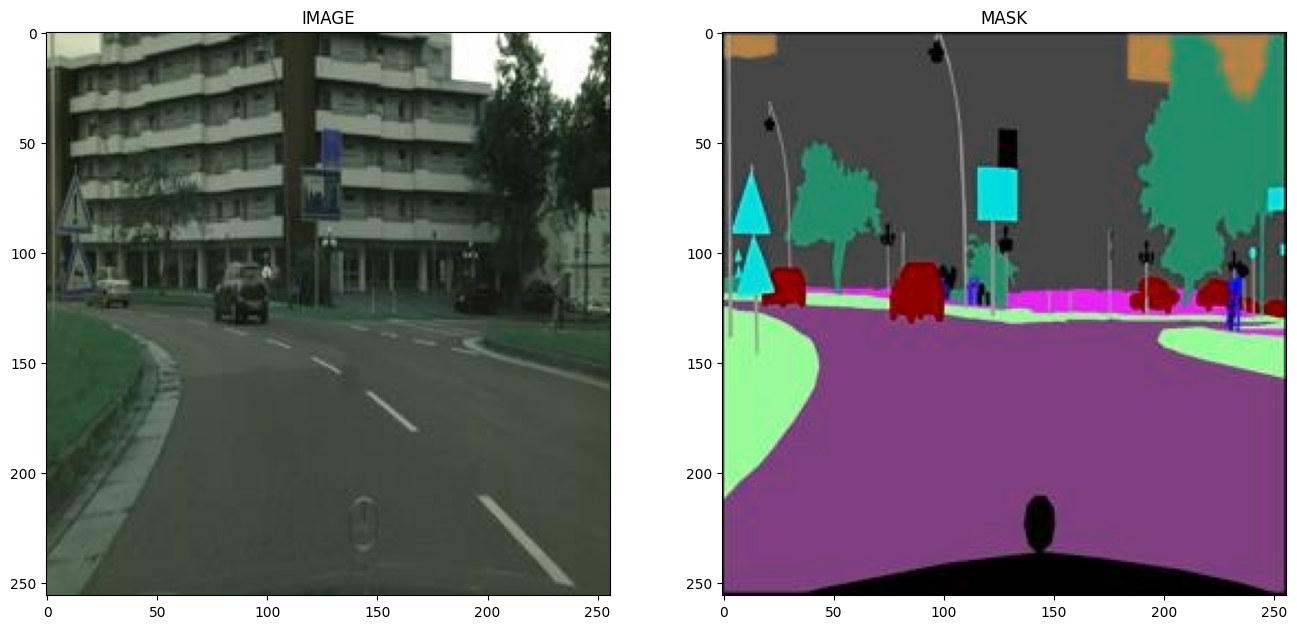

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(pd_dataset_train["IMAGES"].iat[0])
image = img[:, :256]
mask = img[:, 256:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('MASK')
ax2.imshow(mask)

# print(sample_img.shape, sample_msk.shape)

In [ ]:
print(pd_dataset_train.shape, pd_dataset_test.shape)

(2975, 1) (500, 1)


In [ ]:
# from sklearn.model_selection import train_test_split

# pd_train, pd_test = train_test_split(pd_dataset, test_size=0.25, random_state=0)
# # pd_train, pd_val = train_test_split(pd_train, test_size=0.2, random_state=0)
# print("Training set size:", len(pd_train))
# # print("Validation set size:", len(pd_val))
# print("Testing set size:", len(pd_test))

In [ ]:
# def rgb2category(rgb_mask):
#     category_mask = np.zeros(rgb_mask.shape[:2], dtype=np.int8)
#     for i, row in color_dict.iterrows():
#         category_mask += (np.all(rgb_mask.reshape((-1, 3)) == (row['r'], row['g'], row['b']), axis=1).reshape(rgb_mask.shape[:2]) * i)
#     return category_mask

# def category2rgb(category_mask):
#     rgb_mask = np.zeros(category_mask.shape[:2] + (3,))
#     for i, row in color_dict.iterrows():
#         rgb_mask[category_mask==i] = (row['r'], row['g'], row['b'])
#     return np.uint8(rgb_mask)

In [ ]:
import albumentations as aug

train_augment = aug.Compose([
    aug.Resize(IMAGE_SIZE, IMAGE_SIZE),
    aug.HorizontalFlip(p=0.5),
    aug.VerticalFlip(p=0.5),
    aug.RandomBrightnessContrast(p=0.3)
])

test_augment = aug.Compose([
    aug.Resize(IMAGE_SIZE, IMAGE_SIZE),
    aug.RandomBrightnessContrast(p=0.3)
])

In [ ]:
def rgb2category(rgb_mask):
    category_mask = np.zeros(rgb_mask.shape[:2], dtype=np.int8)
    for i, row in color_dict.iterrows():
        category_mask += (np.all(rgb_mask.reshape((-1, 3)) == (row['r'], row['g'], row['b']), axis=1).reshape(rgb_mask.shape[:2]) * i)
        # print(category_mask)
    return category_mask

def category2rgb(category_mask):
    rgb_mask = np.zeros(category_mask.shape[:2] + (3,))
    for i, row in color_dict.iterrows():
        rgb_mask[category_mask==i] = (row['r'], row['g'], row['b'])
    return np.uint8(rgb_mask)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class SegmentationDataset(Dataset):
    def __init__(self, df, augmentations=None, training=None):
        self.df = df
        self.augmentations = augmentations
        self.training = training

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index: int):
        row = self.df.iloc[index]
        img = cv2.imread(row.IMAGES)
        image = img[:, :256]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # if self.training:
        # mask = cv2.imread(row.MASKS)
        mask = img[:, 256:]
        mask = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.augmentations:
            data = self.augmentations(image=image, mask=mask)
            image = data['image']
            mask = data['mask']

          # if label == 0:
          #     mask = np.zeros((320,320))
          # else:
          #     mask = np.ones((320,320))
          #   # mask = data['mask']
          #   mask = category2rgb(mask)

        # if self.training:
        mask = rgb2category(mask)
          # print(mask.shape)


        image = np.transpose(image, (2, 0, 1)).astype(np.float64)
        # if self.training:
        mask = np.expand_dims(mask, axis=0)

        image = torch.Tensor(image) / 255.0
        # if self.training:
        mask = torch.Tensor(mask).long()
        # if self.training:
        return image, mask
        # else:
        #   return image, label

In [ ]:

# class SegmentationDataModule(pl.LightningDataModule):
#     def __init__(self, pd_train, pd_val, pd_test, batch_size=10):
#         super().__init__()
#         self.pd_train = pd_train
#         self.pd_val = pd_val
#         self.pd_test = pd_test
#         self.batch_size=batch_size

#     def setup(self, stage=None):
#         self.train_dataset = SegmentationDataset(self.pd_train, train_augment)
#         self.val_dataset = SegmentationDataset(self.pd_val, test_augment)
#         self.test_dataset = SegmentationDataset(self.pd_test, test_augment)

#     def train_dataloader(self):
#         return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=2)

#     def val_dataloader(self):
#         return DataLoader(self.val_dataset, batch_size=self.batch_size // 2, shuffle=False, num_workers=1)

#     def test_dataloader(self):
#         return DataLoader(self.test_dataset, batch_size=self.batch_size // 2, shuffle=False, num_workers=1)

#     # def predict_dataloader(self):
#     #     return DataLoader(self.predict_dataset, batch_size=self.batch_size // 2, shuffle=False, num_workers=1)

In [ ]:
# data_module = SegmentationDataModule(pd_train, pd_val, pd_test, batch_size=BATCH_SIZE)
# data_module.setup()

In [ ]:
# data_module.

In [ ]:
# image, mask = next(iter(data_module.train_dataloader()))
# image.shape, mask.shape

In [ ]:
# import segmentation_models_pytorch as smp
# Define Feature Fusion module
class FeatureFusion(nn.Module):
    def __init__(self):
        super(FeatureFusion, self).__init__()
        # 3, 3, 320, 32, 64, 160, 224, 256, 80, 448, 512, 40, 869, 1024, 3, 2240, 2048, 10
        # print(i10, i20, o0)
        self.conv10 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)
        self.conv20 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)
        self.conv30 = nn.Conv2d(in_channels=3 * 2, out_channels=3, kernel_size=3, padding=1)
        self.batchNorm0 = nn.BatchNorm2d(3)


        # print(i11, i21, o1)
        self.conv11 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=1)
        self.conv21 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1)
        self.conv31 = nn.Conv2d(in_channels=32 * 2, out_channels=32, kernel_size=1, padding=1)
        self.batchNorm1 = nn.BatchNorm2d(32)

        # print(i12, i22, o2)
        self.conv12 = nn.Conv2d(in_channels=224, out_channels=224, kernel_size=3)
        self.conv22 = nn.Conv2d(in_channels=256, out_channels=224, kernel_size=3)
        self.conv32 = nn.Conv2d(in_channels=224 * 2, out_channels=224, kernel_size=3, padding=1)
        self.batchNorm2 = nn.BatchNorm2d(224)

        # print(i13, i23, o3)
        self.conv13 = nn.Conv2d(in_channels=448, out_channels=448, kernel_size=1)
        self.conv23 = nn.Conv2d(in_channels=512, out_channels=448, kernel_size=1)
        self.conv33 = nn.Conv2d(in_channels=448 * 2, out_channels=448, kernel_size=1, padding=1)
        self.batchNorm3 = nn.BatchNorm2d(448)

        # print(i14, i24, o4)
        self.conv14 = nn.Conv2d(in_channels=896, out_channels=896, kernel_size=3)
        self.conv24 = nn.Conv2d(in_channels=1024, out_channels=896, kernel_size=3)
        self.conv34 = nn.Conv2d(in_channels=896 * 2, out_channels=896, kernel_size=3, padding=1)
        self.batchNorm4 = nn.BatchNorm2d(896)

        # print(i15, i25, o5)
        self.conv15 = nn.Conv2d(in_channels=2240, out_channels=2240, kernel_size=1)
        self.conv25 = nn.Conv2d(in_channels=2048, out_channels=2240, kernel_size=1)
        self.conv35 = nn.Conv2d(in_channels=2240 * 2, out_channels=2240, kernel_size=1, padding=1)
        self.batchNorm5 = nn.BatchNorm2d(2240)


        self.relu = nn.ReLU(inplace=True)


    def forward(self, x1, x2):
        # x1 = torch.nn.functional.interpolate(x1, size=x2.size()[2:], mode='bilinear', align_corners=True)
        # print("X1: ", len(x1), x1[0].size(), type(x1))
        # print("X2: ", len(x2), type(x2), len(x1[0]), len(x1[0][0]), len(x1[0][0][0]), len(x1[0][0][0]))
        # for i in range(len(x1)):
        #   print(i, x1[i].size(), x2[i].size())
        x = []
        # print(x1[0].size(), x2[0].size())
        temp1 = self.conv10(x1[0])
        temp2 = self.conv20(x2[0])
        temp3 = torch.cat((temp1, temp2), dim=1)
        temp3 = self.conv30(temp3)
        temp3 = self.batchNorm0(temp3)
        temp3 = self.relu(temp3)
        x.append(temp3)

        # print(x1[1].size(), x2[1].size())
        temp1 = self.conv11(x1[1])
        temp2 = self.conv21(x2[1])
        temp3 = torch.cat((temp1, temp2), dim=1)
        temp3 = self.conv31(temp3)
        temp3 = self.batchNorm1(temp3)
        temp3 = self.relu(temp3)
        x.append(temp3)

        # print(x1[2].size(), x2[2].size())
        temp1 = self.conv12(x1[2])
        temp2 = self.conv22(x2[2])
        temp3 = torch.cat((temp1, temp2), dim=1)
        temp3 = self.conv32(temp3)
        temp3 = self.batchNorm2(temp3)
        temp3 = self.relu(temp3)
        x.append(temp3)

        # print(x1[3].size(), x2[3].size())
        temp1 = self.conv13(x1[3])
        temp2 = self.conv23(x2[3])
        temp3 = torch.cat((temp1, temp2), dim=1)
        temp3 = self.conv33(temp3)
        temp3 = self.batchNorm3(temp3)
        temp3 = self.relu(temp3)
        x.append(temp3)

        # print(x1[4].size(), x2[4].size())
        temp1 = self.conv14(x1[4])
        temp2 = self.conv24(x2[4])
        temp3 = torch.cat((temp1, temp2), dim=1)
        temp3 = self.conv34(temp3)
        temp3 = self.batchNorm4(temp3)
        temp3 = self.relu(temp3)
        x.append(temp3)

        # print(x1[5].size(), x2[5].size())
        temp1 = self.conv15(x1[5])
        temp2 = self.conv25(x2[5])
        temp3 = torch.cat((temp1, temp2), dim=1)
        temp3 = self.conv35(temp3)
        temp3 = self.batchNorm5(temp3)
        temp3 = self.relu(temp3)
        x.append(temp3)
        # x = torch.cat((x1, x2), dim=1)
        # x = self.conv3(x)
        # x = self.relu(x)
        # outputs = []

        #   # o1 = self.conv1(x1[i])
        #   # o2 = self.conv2(x2[i])
        #   # x = torch.cat((o1, o2), dim=1)
        #   # x = self.conv3(x)
        #   # x = self.relu(x)
        #   # outputs.append(x)
        return x

# Define the combined UNet++ model
class CombinedUNetPP(nn.Module):
    def __init__(self, unet1, unet2):
        super(CombinedUNetPP, self).__init__()
        self.unet1 = unet1
        self.unet2 = unet2
        # 0 torch.Size([3, 3, 320, 320]) torch.Size([3, 3, 320, 320])
        # 1 torch.Size([3, 32, 160, 160]) torch.Size([3, 64, 160, 160])
        # 2 torch.Size([3, 224, 80, 80]) torch.Size([3, 256, 80, 80])
        # 3 torch.Size([3, 448, 40, 40]) torch.Size([3, 512, 40, 40])
        # 4 torch.Size([3, 896, 20, 20]) torch.Size([3, 1024, 20, 20])
        # 5 torch.Size([3, 2240, 10, 10]) torch.Size([3, 2048, 10, 10])



        self.fusion = FeatureFusion()
        self.conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=1)

    def forward(self, x):
        # print(x.size())
        x1 = self.unet1.encoder(x)
        # for i in range(len(x1)):
        #   print(x1[i].size())
        # print()
        x2 = self.unet2.encoder(x)
        x = self.fusion(x1, x2)
        # for i in range(len(x)):
        #   print(x[i].size())
        # x = torch.cat((x1, x2), dim=1)
        x = self.unet1.decoder(*x1)
        # print(x.size())
        # x = self.conv(x)
        x = self.unet2.segmentation_head(x)
        # x = self.conv(x)
        # print(x.shape)
        # x.shape()


        return x

In [ ]:
from segmentation_models_pytorch import UnetPlusPlus
from segmentation_models_pytorch.losses import DiceLoss
from segmentation_models_pytorch.metrics import get_stats, iou_score, accuracy, precision, recall, f1_score
# from transformers import DinatModel


class SegmentationModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model1 = UnetPlusPlus(
            encoder_name="timm-regnety_120",
            encoder_weights="imagenet",
            in_channels=3,
            classes=len(CLASSES),
            activation="softmax"
        )

        self.model2 = UnetPlusPlus(
            encoder_name="resnet50",
            encoder_weights="imagenet",
            in_channels=3,
            classes=len(CLASSES),
            activation="softmax"
        )
        self.model = CombinedUNetPP(self.model1, self.model2)
        # self.model = CNNModel()
        # self.model = DiNAT(in_channels=3, out_channels=len(CLASSES), d=2, num_heads=8, hidden_dim=512, num_layers=3)
        # self.model = CNN(in_channels=3, n_classes=len(CLASSES))
        # self.model = DinatModel.from_pretrained("shi-labs/dinat-mini-in1k-224")
        self.criterion = DiceLoss(mode="multiclass", from_logits=False)

    def forward(self, inputs, targets=None):
        outputs = self.model(inputs)
        if targets is not None:
            loss = self.criterion(outputs, targets)
            tp, fp, fn, tn = get_stats(outputs.argmax(dim=1).unsqueeze(1).type(torch.int64), targets, mode='multiclass', num_classes=len(CLASSES))
            metrics = {
                "Accuracy": accuracy(tp, fp, fn, tn, reduction="micro-imagewise"),
                "IoU": iou_score(tp, fp, fn, tn, reduction="micro-imagewise"),
                "Precision": precision(tp, fp, fn, tn, reduction="micro-imagewise"),
                "Recall": recall(tp, fp, fn, tn, reduction="micro-imagewise"),
                "F1score": f1_score(tp, fp, fn, tn, reduction="micro-imagewise")
            }
            return loss, metrics, outputs
        else:
            return outputs

    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=0.0001)

    def training_step(self, batch, batch_idx):
        images, masks = batch

        loss, metrics, outputs = self(images, masks)
        self.log_dict({
            "train/Loss": loss,
            "train/IoU": metrics['IoU'],
            "train/Accuracy": metrics['Accuracy'],
            "train/Precision": metrics['Precision'],
            "train/Recall": metrics['Recall'],
            "train/F1score": metrics['F1score']
        }, prog_bar=True, logger=True, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, masks = batch

        loss, metrics, outputs = self(images, masks)
        self.log_dict({
            "val/Loss": loss,
            "val/IoU": metrics['IoU'],
            "val/Accuracy": metrics['Accuracy'],
            "val/Precision": metrics['Precision'],
            "val/Recall": metrics['Recall'],
            "val/F1score": metrics['F1score']
        }, prog_bar=True, logger=True, on_step=False, on_epoch=True)
        return loss

    def test_step(self, batch, batch_idx):
        images, masks = batch

        loss, metrics, outputs = self(images, masks)
        self.log_dict({
            "test/Loss": loss,
            "test/IoU": metrics['IoU'],
            # "test/Accuracy": metrics['Accuracy'],
            "test/Precision": metrics['Precision'],
            "test/Recall": metrics['Recall'],
            "test/F1score": metrics['F1score']
        }, prog_bar=True, logger=True, on_step=False, on_epoch=True)
        return loss

In [ ]:
import gc
gc.collect()

58

In [ ]:
from torchinfo import summary

model = SegmentationModel()
summary(model, input_size=(BATCH_SIZE, 3, IMAGE_SIZE, IMAGE_SIZE))

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-regnet/regnety_120-721ba79a.pth" to /root/.cache/torch/hub/checkpoints/regnety_120-721ba79a.pth
100%|██████████| 198M/198M [00:02<00:00, 74.0MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 98.2MB/s]
/usr/local/lib/python3.10/dist-packages/segmentation_models_pytorch/base/modules.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


Layer (type:depth-idx)                                       Output Shape              Param #
SegmentationModel                                            [16, 29, 320, 320]        --
├─CombinedUNetPP: 1-1                                        [16, 29, 320, 320]        25,481,779
│    └─UnetPlusPlus: 2-4                                     --                        (recursive)
│    │    └─RegNetEncoder: 3-1                               [16, 3, 320, 320]         49,581,544
│    └─UnetPlusPlus: 2-5                                     --                        (recursive)
│    │    └─ResNetEncoder: 3-2                               [16, 3, 320, 320]         23,508,032
│    └─FeatureFusion: 2-3                                    [16, 3, 318, 318]         --
│    │    └─Conv2d: 3-3                                      [16, 3, 318, 318]         84
│    │    └─Conv2d: 3-4                                      [16, 3, 318, 318]         84
│    │    └─Conv2d: 3-5                              

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import CSVLogger

checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val/F1score",
    mode="min"
)

logger = CSVLogger("lightning_logs", name="cityscapes-log")

early_stopping_callback = EarlyStopping(monitor="val/Accuracy", patience=5)

trainer = pl.Trainer(
    logger=logger,
    log_every_n_steps=200,
    callbacks=[checkpoint_callback, early_stopping_callback],
    max_epochs=EPOCHS,
    accelerator="gpu",
    devices=1
)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# from torch.utils.data import Dataset, DataLoader

# class SegmentationDataset(Dataset):
#     def __init__(self, df, augmentations=None):
#         self.df = df
#         self.augmentations = augmentations

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, index: int):
#         row = self.df.iloc[index]

#         image = cv2.imread(row.IMAGES)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         mask = cv2.imread(row.MASKS)
#         mask = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         if self.augmentations:
#             data = self.augmentations(image=image, mask=mask)
#             image = data['image']
#             mask = data['mask']

#         mask = rgb2category(mask)

#         image = np.transpose(image, (2, 0, 1)).astype(np.float64)
#         mask = np.expand_dims(mask, axis=0)

#         image = torch.Tensor(image) / 255.0
#         mask = torch.Tensor(mask).long()

#         return image, mask

In [ ]:
def train_dataloader(pd_train):
    train_dataset = SegmentationDataset(pd_train, train_augment)
    return DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=2)

def val_dataloader(pd_val):
    val_dataset = SegmentationDataset(pd_val, test_augment)
    return DataLoader(val_dataset, batch_size=10 // 2, shuffle=False, num_workers=1)

def test_dataloader(pd_test):
    test_dataset = SegmentationDataset(pd_test, test_augment)
    return DataLoader(test_dataset, batch_size=10 // 2, shuffle=False, num_workers=1)

In [ ]:
from sklearn.model_selection import train_test_split
pd_train_1 = pd_dataset_train[0:200]
pd_train_2 = pd_dataset_train[200:400]
pd_train_3 = pd_dataset_train[400:600]
pd_train_4 = pd_dataset_train[600:800]
pd_train_5 = pd_dataset_train[800:1000]
pd_train_6 = pd_dataset_train[1000:1200]
pd_train_7 = pd_dataset_train[1200:1400]
pd_train_8 = pd_dataset_train[1400:1600]
pd_train_9 = pd_dataset_train[1600:1800]
pd_train_10 = pd_dataset_train[1800:2000]
pd_train_11 = pd_dataset_train[2000:2200]
pd_train_12 = pd_dataset_train[2200:2400]
pd_train_13 = pd_dataset_train[2400:2600]
pd_train_14 = pd_dataset_train[2600:2800]
pd_train_15 = pd_dataset_train[2800:]


# pd_train, pd_test = train_test_split(pd_dataset, test_size=0.25, random_state=0)
pd_train1, pd_val1 = train_test_split(pd_train_1, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train1))
print("Validation set size:", len(pd_val1))

pd_train2, pd_val2 = train_test_split(pd_train_2, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train2))
print("Validation set size:", len(pd_val2))

pd_train3, pd_val3 = train_test_split(pd_train_3, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train3))
print("Validation set size:", len(pd_val3))

pd_train4, pd_val4 = train_test_split(pd_train_4, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train4))
print("Validation set size:", len(pd_val4))

pd_train5, pd_val5 = train_test_split(pd_train_5, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train5))
print("Validation set size:", len(pd_val5))

pd_train6, pd_val6 = train_test_split(pd_train_6, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train6))
print("Validation set size:", len(pd_val6))

pd_train7, pd_val7 = train_test_split(pd_train_7, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train7))
print("Validation set size:", len(pd_val7))

pd_train8, pd_val8 = train_test_split(pd_train_8, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train8))
print("Validation set size:", len(pd_val8))

pd_train9, pd_val9 = train_test_split(pd_train_9, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train9))
print("Validation set size:", len(pd_val9))

pd_train10, pd_val10 = train_test_split(pd_train_10, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train10))
print("Validation set size:", len(pd_val10))

pd_train11, pd_val11 = train_test_split(pd_train_11, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train11))
print("Validation set size:", len(pd_val11))

pd_train12, pd_val12 = train_test_split(pd_train_12, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train12))
print("Validation set size:", len(pd_val12))

pd_train13, pd_val13 = train_test_split(pd_train_13, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train13))
print("Validation set size:", len(pd_val13))

pd_train14, pd_val14 = train_test_split(pd_train_14, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train14))
print("Validation set size:", len(pd_val14))

pd_train15, pd_val15 = train_test_split(pd_train_15, test_size=0.2, random_state=0)
print("Training set size:", len(pd_train15))
print("Validation set size:", len(pd_val15))

train_data1 = train_dataloader(pd_train1)
val_data1 = val_dataloader(pd_val1)

train_data2 = train_dataloader(pd_train2)
val_data2 = val_dataloader(pd_val2)

train_data3 = train_dataloader(pd_train3)
val_data3 = val_dataloader(pd_val3)

train_data4 = train_dataloader(pd_train4)
val_data4 = val_dataloader(pd_val4)

train_data5 = train_dataloader(pd_train5)
val_data5 = val_dataloader(pd_val5)

train_data6 = train_dataloader(pd_train6)
val_data6 = val_dataloader(pd_val6)

train_data7 = train_dataloader(pd_train7)
val_data7 = val_dataloader(pd_val7)

train_data8 = train_dataloader(pd_train8)
val_data8 = val_dataloader(pd_val8)

train_data9 = train_dataloader(pd_train9)
val_data9 = val_dataloader(pd_val9)

train_data10 = train_dataloader(pd_train10)
val_data10 = val_dataloader(pd_val10)

train_data11 = train_dataloader(pd_train11)
val_data11 = val_dataloader(pd_val11)

train_data12 = train_dataloader(pd_train12)
val_data12 = val_dataloader(pd_val12)

train_data13 = train_dataloader(pd_train13)
val_data13 = val_dataloader(pd_val13)

train_data14 = train_dataloader(pd_train14)
val_data14 = val_dataloader(pd_val14)

train_data15 = train_dataloader(pd_train15)
val_data15 = val_dataloader(pd_val15)


Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 160
Validation set size: 40
Training set size: 140
Validation set size: 35


In [ ]:
test_data = test_dataloader(pd_dataset_test)
# test_data_2 = test_dataloader(pd_dataset_test[250:])

print("Testing set size:", len(test_data), len(pd_dataset_test))
# print("Testing set size:", len(test_data_2), len(pd_dataset_test))

# print(len(val_data1), len(train_data1))
# print(len(val_data2), len(train_data2))
# print(len(val_data3), len(train_data3))

# train_data4 = train_dataloader(pd_train4)
# val_data4 = val_dataloader(pd_val4)

Testing set size: 100 500


In [ ]:
# # define a cross validation function
# def crossvalid(model=None,criterion=None,optimizer=None,dataset=None,k_fold=5):

#     train_score = pd.Series()
#     val_score = pd.Series()

#     total_size = len(dataset)
#     fraction = 1/k_fold
#     seg = int(total_size * fraction)
#     # tr:train,val:valid; r:right,l:left;  eg: trrr: right index of right side train subset
#     # index: [trll,trlr],[vall,valr],[trrl,trrr]
#     for i in range(k_fold):
#         trll = 0
#         trlr = i * seg
#         vall = trlr
#         valr = i * seg + seg
#         trrl = valr
#         trrr = total_size
#         # msg
# #         print("train indices: [%d,%d),[%d,%d), test indices: [%d,%d)"
# #               % (trll,trlr,trrl,trrr,vall,valr))

#         train_left_indices = list(range(trll,trlr))
#         train_right_indices = list(range(trrl,trrr))

#         train_indices = train_left_indices + train_right_indices
#         val_indices = list(range(vall,valr))

#         train_set = torch.utils.data.dataset.Subset(dataset,train_indices)
#         val_set = torch.utils.data.dataset.Subset(dataset,val_indices)

# #         print(len(train_set),len(val_set))
# #         print()

#         train_loader = torch.utils.data.DataLoader(train_set, batch_size=50,
#                                           shuffle=True, num_workers=4)
#         val_loader = torch.utils.data.DataLoader(val_set, batch_size=50,
#                                           shuffle=True, num_workers=4)
#         train_acc = train(res_model,criterion,optimizer,train_loader,epoch=1)
#         train_score.at[i] = train_acc
#         val_acc = valid(res_model,criterion,optimizer,val_loader)
#         val_score.at[i] = val_acc

#     return train_score,val_score


# train_score,val_score = crossvalid(res_model,criterion,optimizer,dataset=tiny_dataset)

In [ ]:
import gc
gc.collect()

30

In [ ]:
trainer.fit(model, train_data1, val_data1)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/segmentation_models_pytorch/base/modules.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=200). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 16: 'val/F1score' reached 0.00945 (best 0.00945), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 32: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 48: 'val/F1score' was not in top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3

# trainer.fit_loop.epoch_loop.max_steps += 3
trainer.fit(model, train_data2, val_data2)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/segmentation_models_pytorch/base/modules.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=200). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 64: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 80: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 96: 'val/F1score' was not in top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
# trainer.fit_loop.epoch_loop.max_steps += 150
trainer.fit(model, train_data3, val_data3)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer was signaled to stop but the required `min_epochs=9` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 112: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 128: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 144: 'val/F1score' was not in top 1


In [ ]:
import gc
gc.collect()

0

In [ ]:
# trainer.fit(model, data_module)
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data4, val_data4)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer was signaled to stop but the required `min_epochs=12` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 160: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 176: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 192: 'val/F1score' was not in top 1


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data5, val_data5)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer was signaled to stop but the required `min_epochs=15` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 208: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 224: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 240: 'val/F1score' was not in top 1


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data6, val_data6)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer was signaled to stop but the required `min_epochs=18` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 256: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 272: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 288: 'val/F1score' was not in top 1


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data7, val_data7)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer was signaled to stop but the required `min_epochs=21` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 304: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 320: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 336: 'val/F1score' was not in top 1


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data8, val_data8)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type           | Params
---------------------------------------------
0 | model1    | UnetPlusPlus   | 71.0 M
1 | model2    | UnetPlusPlus   | 49.0 M
2 | model     | CombinedUNetPP | 172 M 
3 | criterion | DiceLoss       | 0     
---------------------------------------------
172 M     Trainable params
0         Non-trainable params
172 M     Total params
689.229   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer was signaled to stop but the required `min_epochs=24` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 21, global step 352: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 22, global step 368: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 23, global step 384: 'val/F1score' was not in top 1


In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data9, val_data9)

In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data10, val_data10)

In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data11, val_data11)

In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data12, val_data12)

In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data13, val_data13)

In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data14, val_data14)

In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit_loop.max_epochs += 3
trainer.fit_loop.min_epochs += 3
trainer.fit(model, train_data15, val_data15)

In [ ]:
import gc
gc.collect()

0

In [ ]:
trainer.test(model, test_data)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test/F1score        │    0.9959042072296143     │
│         test/IoU          │    0.9918432235717773     │
│         test/Loss         │   0.012563644908368587    │
│      test/Precision       │    0.9959042072296143     │
│        test/Recall        │    0.9959042072296143     │
└───────────────────────────┴───────────────────────────┘

[{'test/Loss': 0.012563644908368587,
  'test/IoU': 0.9918432235717773,
  'test/Precision': 0.9959042072296143,
  'test/Recall': 0.9959042072296143,
  'test/F1score': 0.9959042072296143}]

In [ ]:
from segmentation_models_pytorch import UnetPlusPlus
from segmentation_models_pytorch.losses import DiceLoss
from segmentation_models_pytorch.metrics import get_stats, iou_score, accuracy, precision, recall, f1_score
# from transformers import DinatModel


class SegmentationModelBase(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # self.model1 = UnetPlusPlus(
        #     encoder_name="timm-regnety_120",
        #     encoder_weights="imagenet",
        #     in_channels=3,
        #     classes=len(CLASSES),
        #     activation="softmax"
        # )

        self.model = UnetPlusPlus(
            encoder_name="resnet50",
            encoder_weights="imagenet",
            in_channels=3,
            classes=len(CLASSES),
            activation="softmax"
        )

        self.criterion = DiceLoss(mode="multiclass", from_logits=False)

    def forward(self, inputs, targets=None):
        # outputs1 = self.model1(inputs)
        # outputs2 = self.model2(inputs)
        outputs = self.model(inputs)
        # concat_out = torch.cat((outputs1, outputs2), dim=1)
        if targets is not None:
            # loss = self.criterion(concat_out, targets)
            loss = self.criterion(outputs, targets)
            tp, fp, fn, tn = get_stats(outputs.argmax(dim=1).unsqueeze(1).type(torch.int64), targets, mode='multiclass', num_classes=len(CLASSES))
            # tp, fp, fn, tn = get_stats(concat_out.argmax(dim=1).unsqueeze(1).type(torch.int64), targets, mode='multiclass', num_classes=len(CLASSES))
            metrics = {
                "Accuracy": accuracy(tp, fp, fn, tn, reduction="micro-imagewise"),
                "IoU": iou_score(tp, fp, fn, tn, reduction="micro-imagewise"),
                "Precision": precision(tp, fp, fn, tn, reduction="micro-imagewise"),
                "Recall": recall(tp, fp, fn, tn, reduction="micro-imagewise"),
                "F1score": f1_score(tp, fp, fn, tn, reduction="micro-imagewise")
            }
            # return loss, metrics, concat_out
            return loss, metrics, outputs
        else:
            return outputs
            # return concat_out

    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=0.0001)

    def training_step(self, batch, batch_idx):
        images, masks = batch

        loss, metrics, outputs = self(images, masks)
        self.log_dict({
            "train/Loss": loss,
            "train/IoU": metrics['IoU'],
            "train/Accuracy": metrics['Accuracy'],
            "train/Precision": metrics['Precision'],
            "train/Recall": metrics['Recall'],
            "train/F1score": metrics['F1score']
        }, prog_bar=True, logger=True, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, masks = batch

        loss, metrics, outputs = self(images, masks)
        self.log_dict({
            "val/Loss": loss,
            "val/IoU": metrics['IoU'],
            "val/Accuracy": metrics['Accuracy'],
            "val/Precision": metrics['Precision'],
            "val/Recall": metrics['Recall'],
            "val/F1score": metrics['F1score']
        }, prog_bar=True, logger=True, on_step=False, on_epoch=True)
        return loss

    def test_step(self, batch, batch_idx):
        images, masks = batch

        loss, metrics, outputs = self(images, masks)
        self.log_dict({
            "test/Loss": loss,
            "test/IoU": metrics['IoU'],
            "test/Accuracy": metrics['Accuracy'],
            "test/Precision": metrics['Precision'],
            "test/Recall": metrics['Recall'],
            "test/F1score": metrics['F1score']
        }, prog_bar=True, logger=True, on_step=False, on_epoch=True)
        return loss

In [ ]:
import gc
gc.collect()

0

In [ ]:
from torchinfo import summary

model = SegmentationModelBase()
summary(model, input_size=(BATCH_SIZE, 3, IMAGE_SIZE, IMAGE_SIZE))

Layer (type:depth-idx)                             Output Shape              Param #
SegmentationModelBase                              [16, 29, 320, 320]        --
├─UnetPlusPlus: 1-1                                [16, 29, 320, 320]        --
│    └─ResNetEncoder: 2-1                          [16, 3, 320, 320]         --
│    │    └─Conv2d: 3-1                            [16, 64, 160, 160]        9,408
│    │    └─BatchNorm2d: 3-2                       [16, 64, 160, 160]        128
│    │    └─ReLU: 3-3                              [16, 64, 160, 160]        --
│    │    └─MaxPool2d: 3-4                         [16, 64, 80, 80]          --
│    │    └─Sequential: 3-5                        [16, 256, 80, 80]         215,808
│    │    └─Sequential: 3-6                        [16, 512, 40, 40]         1,219,584
│    │    └─Sequential: 3-7                        [16, 1024, 20, 20]        7,098,368
│    │    └─Sequential: 3-8                        [16, 2048, 10, 10]        14,964,736
│   

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import CSVLogger

checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val/F1score",
    mode="min"
)

logger = CSVLogger("lightning_logs", name="cityscapes-log1")

early_stopping_callback = EarlyStopping(monitor="val/Accuracy", patience=5)

trainerBase = pl.Trainer(
    logger=logger,
    log_every_n_steps=200,
    callbacks=[checkpoint_callback, early_stopping_callback],
    max_epochs=EPOCHS,
    accelerator="gpu",
    devices=1
)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
import gc
gc.collect()

30

In [ ]:
# trainer.fit(model, data_module)

trainerBase.fit(model, train_data1, val_data1)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type         | Params
-------------------------------------------
0 | model     | UnetPlusPlus | 49.0 M
1 | criterion | DiceLoss     | 0     
-------------------------------------------
49.0 M    Trainable params
0         Non-trainable params
49.0 M    Total params
195.959   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 16: 'val/F1score' reached 0.84312 (best 0.84312), saving model to '/content/checkpoints/best-checkpoint-v1.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 32: 'val/F1score' reached 0.45330 (best 0.45330), saving model to '/content/checkpoints/best-checkpoint-v1.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 48: 'val/F1score' reached 0.31147 (best 0.31147), saving model to '/content/checkpoints/best-checkpoint-v1.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainerBase.fit_loop.max_epochs += 3
# trainerBase.fit_loop.epoch_loop.max_steps += 3
trainerBase.fit(model, train_data2, val_data2)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type         | Params
-------------------------------------------
0 | model     | UnetPlusPlus | 49.0 M
1 | criterion | DiceLoss     | 0     
-------------------------------------------
49.0 M    Trainable params
0         Non-trainable params
49.0 M    Total params
195.959   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 64: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 80: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 96: 'val/F1score' was not in top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


In [ ]:
import gc
gc.collect()

0

In [ ]:
trainerBase.fit_loop.max_epochs += 2
trainerBase.fit_loop.min_epochs += 2
# trainerBase.fit_loop.epoch_loop.max_steps += 150
trainerBase.fit(model, train_data7, val_data7)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type         | Params
-------------------------------------------
0 | model     | UnetPlusPlus | 49.0 M
1 | criterion | DiceLoss     | 0     
-------------------------------------------
49.0 M    Trainable params
0         Non-trainable params
49.0 M    Total params
195.959   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/segmentation_models_pytorch/base/modules.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=200). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer was signaled to stop but the required `min_epochs=17` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 256: 'val/F1score' was not in top 1


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 272: 'val/F1score' was not in top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=17` reached.


In [ ]:
# pd_test.iloc[0].MASKS

'deepglobe-land-cover-classification-dataset/train/654770_mask.png'

In [ ]:
# first_mask = pd_test.iloc[0].MASKS
# for i in range(1, 50):
#   mask = pd_test.iloc[i].MASKS
#   pd_test.iat[i-1, 1] = mask
# pd_test.iat[49, 1] = first_mask

In [ ]:
# pd_test.iloc[0].MASKS

'deepglobe-land-cover-classification-dataset/train/946408_mask.png'

In [ ]:
# test_data = test_dataloader(pd_test)
# print("Testing set size:", len(test_data), len(pd_test))

Testing set size: 41 201


In [ ]:
# trainer.test(model, data_module)
trainerBase.test(model, test_data)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test/Accuracy       │    0.9514516592025757     │
│       test/F1score        │    0.2960517704486847     │
│         test/IoU          │    0.17995522916316986    │
│         test/Loss         │    0.03386511281132698    │
│      test/Precision       │    0.2960517704486847     │
│        test/Recall        │    0.2960517704486847     │
└───────────────────────────┴───────────────────────────┘

[{'test/Loss': 0.03386511281132698,
  'test/IoU': 0.17995522916316986,
  'test/Accuracy': 0.9514516592025757,
  'test/Precision': 0.2960517704486847,
  'test/Recall': 0.2960517704486847,
  'test/F1score': 0.2960517704486847}]


=================================================================== Hybrid Model ====================================================================



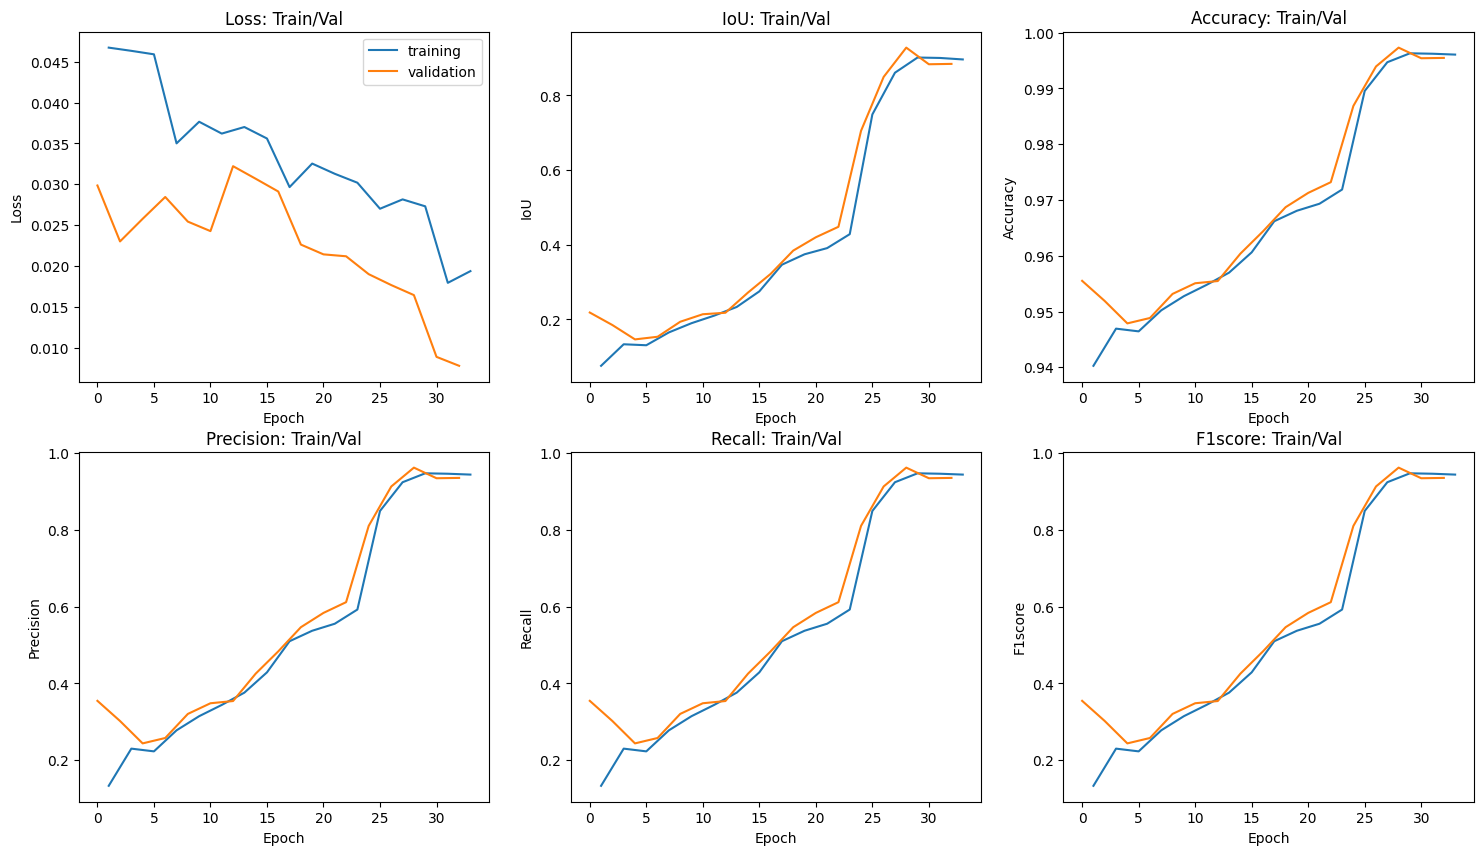

In [ ]:
metrics = pd.read_csv("./lightning_logs/cityscapes-log/version_0/metrics.csv")
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 10))

print("\n=================================================================== Hybrid Model ====================================================================\n")

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
names = ['Loss', 'IoU', 'Accuracy', 'Precision', 'Recall', 'F1score']
for axis, name in zip(axes, names):
    axis.plot(metrics[f'train/{name}'].dropna())
    axis.plot(metrics[f'val/{name}'].dropna())
    axis.set_title(f'{name}: Train/Val')
    axis.set_ylabel(name)
    axis.set_xlabel('Epoch')
    ax1.legend(['training', 'validation'], loc="upper right")




=================================================================== Base Model ==============================================================



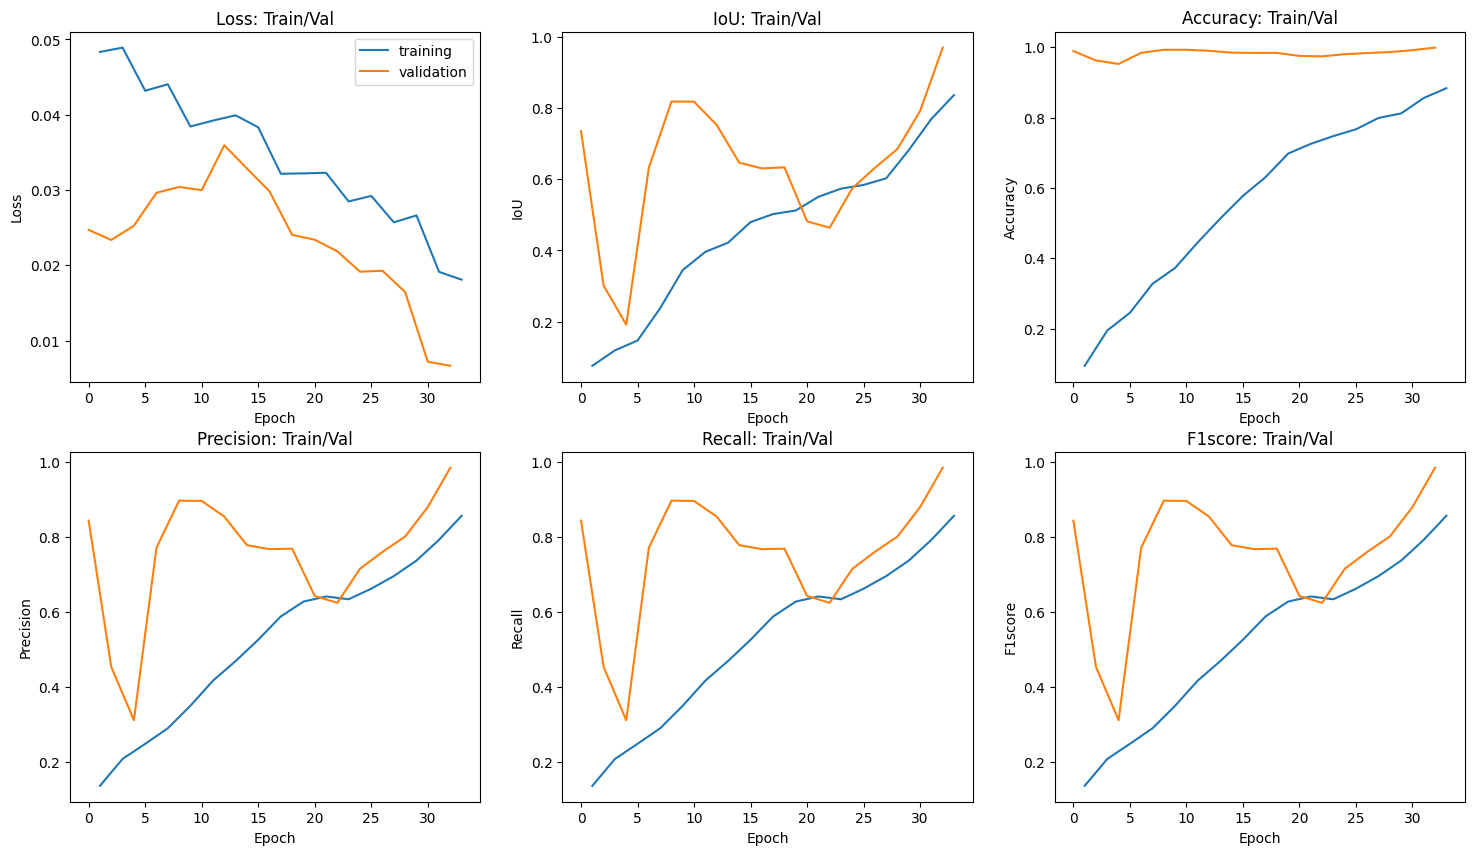

In [ ]:
metrics = pd.read_csv("./lightning_logs/cityscapes-log1/version_0/metrics.csv")
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 10))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
names = ['Loss', 'IoU', 'Accuracy', 'Precision', 'Recall', 'F1score']

print("\n=================================================================== Base Model ==============================================================\n")

for axis, name in zip(axes, names):
    axis.plot(metrics[f'train/{name}'].dropna())
    axis.plot(metrics[f'val/{name}'].dropna())
    axis.set_title(f'{name}: Train/Val')
    axis.set_ylabel(name)
    axis.set_xlabel('Epoch')
    ax1.legend(['training', 'validation'], loc="upper right")

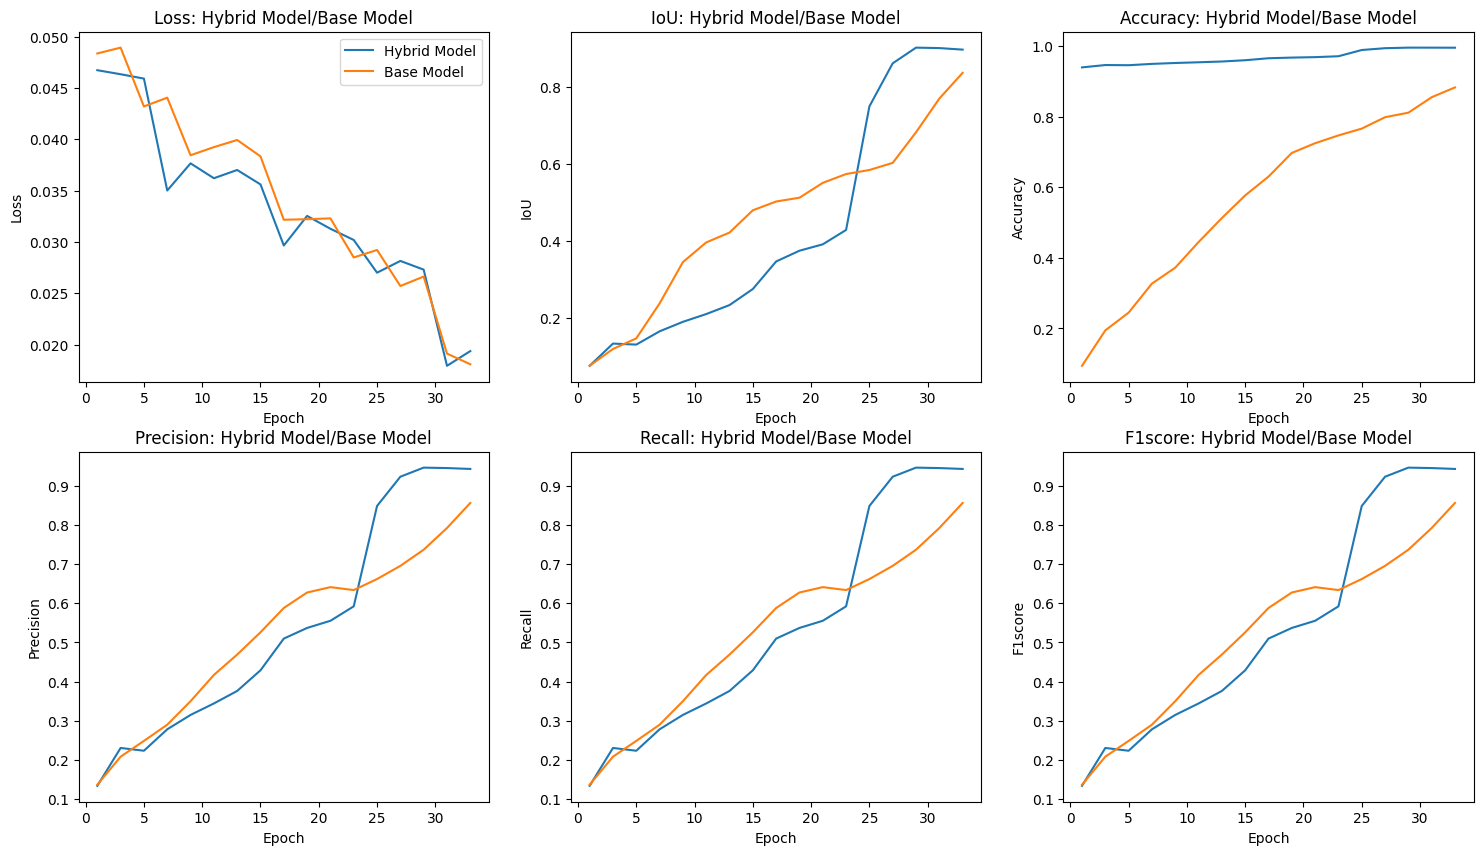

In [ ]:
metrics1 = pd.read_csv("./lightning_logs/cityscapes-log/version_0/metrics.csv")
metrics2 = pd.read_csv("./lightning_logs/cityscapes-log1/version_0/metrics.csv")
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 10))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
names = ['Loss', 'IoU', 'Accuracy', 'Precision', 'Recall', 'F1score']

for axis, name in zip(axes, names):
    axis.plot(metrics1[f'train/{name}'].dropna())
    axis.plot(metrics2[f'train/{name}'].dropna())
    axis.set_title(f'{name}: Hybrid Model/Base Model')
    axis.set_ylabel(name)
    axis.set_xlabel('Epoch')
    ax1.legend(['Hybrid Model', 'Base Model'], loc="upper right")